# Assignment 2
Shivam Chadha  
2019B4AA0704G

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from math import log,log2
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.tree import plot_tree
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import datasets
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score,confusion_matrix

# Question 1

In [2]:
# making data 
# p.s ignore method

list1 = [[i,j] for j in range(1,4 ) for i in range(1,3)]
list2 = [[i,j] for j in range(1,5 ) for i in range(4,6)]
features = list1+list2
labels = [1 if i not in [8,9,12,13] else 0  for i in range(0,14)]
labels= np.array(labels)
feat = sorted(features,key=lambda x: x[0])

feat = np.array(feat)

feat = f1,f2  
labels = class

### Functions

In [3]:
def shannon_entropy(labels):
    tot = len(labels)   # total instances
    p = labels.count(1)/tot # no. of 1 class
    n = labels.count(0)/tot # no. of 0 class
    
    if p == 0 or n==0:
        
        return 0
    
    entropy = -(p)*log2(p) -(n)*log2(n) # formula to calculate
    return entropy


def gini_impurity(labels):
    tot = len(labels)  # total
    p = labels.count(1)/tot # no. of 1 class
    n = labels.count(0)/tot  # no. of 0 class
    impurity = 1 - p*p -n*n  # calc
    return impurity



Calculated

In [4]:
print(shannon_entropy(labels.tolist()))
print(gini_impurity(labels.tolist()))

0.863120568566631
0.40816326530612246


### Hand Written

Class - counts  
1 - 10  
0 - 4  
Shannon Entropy = -(4/14) log2(4/14) - (10/14) log2(10/14)
                = 0.863  

Gini impurity   = 1 - (4/14)^2 -(10/14)^2
                = 0.408

In [5]:
print(-(4/14)*log2(4/14) - (10/14)*log2(10/14))
print(1 - (4/14)**2 -(10/14)**2)

0.863120568566631
0.40816326530612246


### Plot

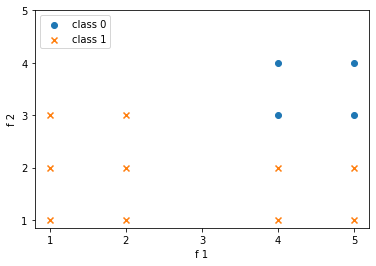

In [6]:
ind1 = [i for i, e in enumerate(labels) if e == 1]
ind0 = [i for i, e in enumerate(labels) if e == 0]
plt.scatter(feat[ind0,0],feat[ind0,1],marker='o',label = 'class 0');
plt.scatter(feat[ind1,0],feat[ind1,1],marker='x',label = 'class 1');
plt.legend(loc='upper left');
plt.xticks(np.arange(1, 6));
plt.yticks(np.arange(1, 6));
plt.xlabel('f 1');
plt.ylabel('f 2');

Intuition:  
Using ID3  
f1<3 : 1  
f1>3 -> f2>2 : 0

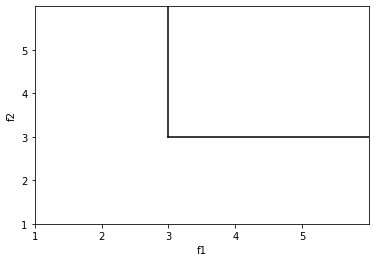

In [7]:
x1, y1 = [3, 3], [3, 6]
x2, y2 = [3, 6], [3, 3]
plt.plot(x1, y1,'black');
plt.plot( x2, y2,'black');
plt.xticks(np.arange(1, 6));
plt.yticks(np.arange(1, 6));
plt.xlim(1,6);
plt.ylim(1,6);
plt.xlabel('f1');
plt.ylabel('f2');

For Discrete features

Calculating head node from scratch

In [8]:
hs = {}
f_s = {}
info_gain= []
l = len(labels)
h = shannon_entropy(labels.tolist())
for f in feat.T:   # f1,f2  
    sum = 0
    for i in np.unique(f):   # each unique value of f1/f2
        ind =  [j for j, e in enumerate(f) if e == i]
        f_s[i] = len(ind)
        hs[i] = shannon_entropy([labels[j] for j in ind]) # calculate the entropy
        sum += hs[i]*f_s[i]/l  # calculate the enropy into sample size / total samples

    info_gain.append(h- sum)



In [9]:
info_gain  # info gain for f1 and f2

[0.2916919971380596, 0.5774062828523453]

In [10]:
mx = max(info_gain)
info_gain.index(max(info_gain))

1

We chose f2 as head node  
value counts

In [11]:
for f in np.unique(feat.T[1]):   # f1,f2
    ind = [j for j,e in enumerate(feat) if e[1]==f ]

    print(f)
    print('0:',np.count_nonzero(labels[ind]==0),'1:',np.count_nonzero(labels[ind]==1))

1
0: 0 1: 4
2
0: 0 1: 4
3
0: 2 1: 2
4
0: 2 1: 0


f2 = 1, 2, and 4 are pure leaves   
We'll look at 3 subtree

In [12]:
# doing the same thing as for head node
hs1 = {}
f_s1 = {}
# info_gain_l1 = []
ind = np.where(feat[:,1]==3)
f1  = feat[ind,0].squeeze()
l1 = labels[ind] 
l = len(l1)
h1 = shannon_entropy(l1.tolist())

Counts in 3 subtree

In [13]:
for f in np.unique(f1):   # f1,f2
    ind = [j for j,e in enumerate(f1) if e ==f ]
    print(f)
    print('0:',np.count_nonzero(l1[ind]==0),'1:',np.count_nonzero(l1[ind]==1))


1
0: 0 1: 1
2
0: 0 1: 1
4
0: 1 1: 0
5
0: 1 1: 0


Since the leaves are pure there we stop here  
(for f2=3 and f1 = 1,2,4,5)

In [14]:

for i in np.unique(f1):
    sum = 0
    ind = [j for j, e in enumerate(f1) if e == i]
    f_s1[i] = len(ind) 
    hs1[i] = shannon_entropy([l1[j] for j in ind])
    sum += hs1[i]*f_s1[i]/l

ifg = h- sum


info gain, total entropy

In [15]:
ifg,h

(0.863120568566631, 0.863120568566631)

f1!=3 : class =1  
f1=3 -> f2=2 : class = 0

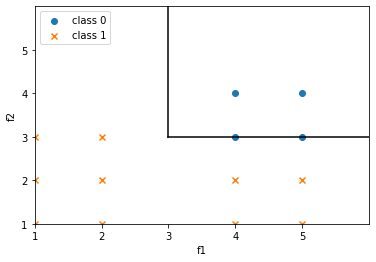

In [16]:
ind1 = [i for i, e in enumerate(labels) if e == 1]
ind0 = [i for i, e in enumerate(labels) if e == 0]
plt.scatter(feat[ind0,0],feat[ind0,1],marker='o',label = 'class 0');
plt.scatter(feat[ind1,0],feat[ind1,1],marker='x',label = 'class 1');
x1, y1 = [3, 3], [3, 6]
x2, y2 = [3, 6], [3, 3]
plt.plot(x1, y1,'black');
plt.plot( x2, y2,'black');
plt.legend(loc='upper left');
plt.xticks(np.arange(1, 6));
plt.yticks(np.arange(1, 6));
plt.xlim(1,6);
plt.ylim(1,6);
plt.xlabel('f1');
plt.ylabel('f2');

### Inbuilt functions

Sklearn decision tree

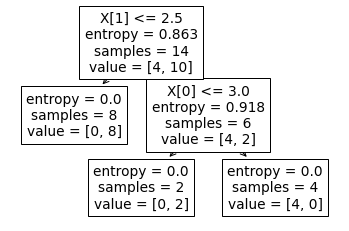

In [17]:
model = dtc(criterion='entropy')
model.fit(feat,labels)
plot_tree(model);
 

Plotting decision boundary using sklearn

<Figure size 432x288 with 0 Axes>

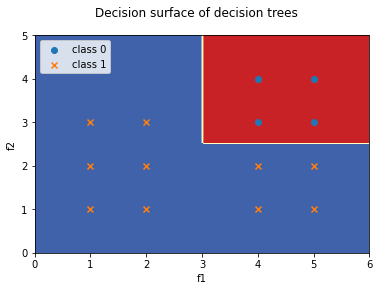

In [18]:


plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
DecisionBoundaryDisplay.from_estimator(
    model,
    feat,
    cmap=plt.cm.RdYlBu,
    response_method="predict",
    xlabel='f1',
    ylabel='f2',
);

ind1 = [i for i, e in enumerate(labels) if e == 1]
ind0 = [i for i, e in enumerate(labels) if e == 0]
plt.scatter(feat[ind0,0],feat[ind0,1],marker='o',label = 'class 0');
plt.scatter(feat[ind1,0],feat[ind1,1],marker='x',label = 'class 1');
# Plot the training points


plt.suptitle("Decision surface of decision trees");
plt.legend(loc='upper left');

# Question 2

In [19]:
# getting data
iris = datasets.load_iris()
X = iris.data  
y = iris.target

In [20]:
X[:5]  # first five elements

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [21]:
np.unique(y) # unique labels

array([0, 1, 2])

Iris dataset 
The dataset contains information about 3 related species of flowers from the iris genus. The species are Iris setosa, Iris virginica and Iris versicolor. It contains information of the physical features of the flower.  
It is a small dataset containing 150 instances.
Multiclass classification.

It has 4 features and 3 labels

The 4 features are
* Sepal Length
* Sepal Width
* Petal Length 
* Petal Width.

The 3 types of iris flowers are
* Setosa
* Versicolour
* Virginica

In [22]:
iris.feature_names # features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [23]:
iris.target_names # targets

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [24]:
print('setosa:',X[y==0].shape[0])
print('versicolor:',X[y==1].shape[0])
print('virginica:',X[y==2].shape[0])

setosa: 50
versicolor: 50
virginica: 50


In [25]:
df = pd.DataFrame(columns = ['Iris_Species','Data_Instances'])
df.Iris_Species = iris.target_names
df.Data_Instances = [50,50,50]
df

,Iris_Species,Data_Instances
0,setosa,50
1,versicolor,50
2,virginica,50


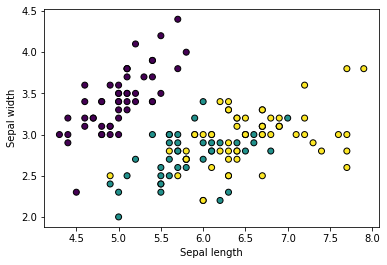

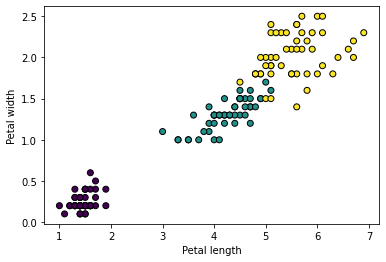

In [26]:
plt.figure(1)
plt.scatter(X[:, 0], X[:, 1], c=y,edgecolor="k");
plt.xlabel("Sepal length");
plt.ylabel("Sepal width");

plt.figure(2)
plt.scatter(X[:, 2], X[:, 3], c=y, edgecolor="k");
plt.xlabel("Petal length");
plt.ylabel("Petal width");

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
print("Train")
print('setosa:',X_train[y_train==0].shape[0])
print('versicolor:',X_train[y_train==1].shape[0])
print('virginica:',X_train[y_train==2].shape[0])
print("Test")
print('setosa:',X_test[y_test==0].shape[0])
print('versicolor:',X_test[y_test==1].shape[0])
print('virginica:',X_test[y_test==2].shape[0])

Train
setosa: 40
versicolor: 41
virginica: 39
Test
setosa: 10
versicolor: 9
virginica: 11


In [29]:
df1 = pd.DataFrame(columns = ['Iris_Species','Train','Test'])
df1.Iris_Species = iris.target_names
df1.Train = np.unique(y_train,return_counts=True)[1]
df1.Test = np.unique(y_test,return_counts=True)[1]
df1

,Iris_Species,Train,Test
0,setosa,40,10
1,versicolor,41,9
2,virginica,39,11


In [30]:
def knn(X_train,y_train,X_test,y_test,k):
    """ knn fucntion
    Input : Training data, Training labels, Testing data,Testing labels ,K (nearest neighbours)
    Output : Predicition on test data"""
    y_pred = []
    for i in range(len(X_test)):  # for all points in test
        t_x = X_test[i] # take point
        t_y = y_test[i]
        j=0
        diff_arr = np.zeros(len(X_train))  # arr for differences
        for tr_x in X_train:  # points in train
            diff = np.sum((tr_x - t_x)**2)   # euclidian distance
            diff_arr[j] = diff # store
            j+=1
        idx = np.argpartition(diff_arr, k)  # sort till k
        idx = idx[:k]  # nearest k vals
        sum_y = 0
        for j in idx:
            sum_y += y_train[j]  # sum of preditied labels
        pred = round(sum_y/k) # chooses most occuring label, in case of equal values of labels chooses middle values
        y_pred.append(pred)
        
    return y_pred

In [31]:
kf = KFold(n_splits=3)  # setting fold to 3

In [32]:
f1s = np.zeros([25,3])  # for storing macro f1-score 
for k in range(1,26): # diff values of k
    i = 0
    for train_index, test_index in kf.split(X_train):  # folds in k folds
        
        X_tr, X_ts = X_train[train_index], X_train[test_index]  # train test features
        y_tr, y_ts = y_train[train_index], y_train[test_index]  # train test labels
        
        y_pred = knn(X_tr,y_tr,X_ts,y_ts,k)   # getinng predictions
        f1s[k-1][i] = f1_score(y_ts,y_pred,average = 'macro')  # storing macro f1
        i+=1  

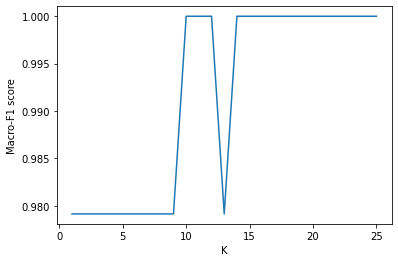

In [33]:
plt.plot(range(1,26),np.amax(f1s,1));
plt.xlabel('K');
plt.ylabel('Macro-F1 score');

choosing k=10  
On Test set

In [34]:
y_pred = knn(X_train,y_train,X_test,y_test,10)

Results on Test set

In [35]:
print("acc:",accuracy_score(y_test,y_pred))
print("recall:",recall_score(y_test,y_pred,average='micro'))
print("precision:",precision_score(y_test,y_pred,average='micro'))
print("f1-score:",f1_score(y_test,y_pred,average='macro'))
print("macro f1-score:",f1_score(y_test,y_pred,average='macro'))

acc: 1.0
recall: 1.0
precision: 1.0
f1-score: 1.0
macro f1-score: 1.0


Confusion matrix for test set

In [36]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

Alternate for Question 1  
Tree based appproach from https://github.com/random-forests/tutorials/blob/master/decision_tree.ipynb

In [37]:
header = ["f1","f2","target"]

In [38]:
from __future__ import print_function

def unique_vals(rows, col):
    """Find the unique values for a column in a dataset."""
    return set([row[col] for row in rows])

def class_counts(rows):
    """Counts the number of each type of example in a dataset."""
    counts = {}  # a dictionary of label -> count.
    for row in rows:
        # in our dataset format, the label is always the last column
        label = row[-1]
        if label not in counts:
            counts[label] = 0
        counts[label] += 1
    return counts

def is_numeric(value):
    """Test if a value is numeric."""
    return isinstance(value, int) or isinstance(value, float)

class Question:
    """A Question is used to partition a dataset."""

    def __init__(self, column, value):
        self.column = column
        self.value = value

    def match(self, example):
        # Compare the feature value in an example to the
        # feature value in this question.
        val = example[self.column]
        if is_numeric(val):
            return val >= self.value
        else:
            return val == self.value

    def __repr__(self):
        # This is just a helper method to print
        # the question in a readable format.
        condition = "=="
        if is_numeric(self.value):
            condition = ">="
        return "Is %s %s %s?" % (
            header[self.column], condition, str(self.value))

def partition(rows, question):
    """Partitions a dataset."""
    true_rows, false_rows = [], []
    for row in rows:
        if question.match(row):
            true_rows.append(row)
        else:
            false_rows.append(row)
    return true_rows, false_rows

def Shannon(rows):
    """Calculate the shannon entropy for a list of rows."""
    counts = class_counts(rows)
    impurity = 1
    for lbl in counts:
        prob_of_lbl = counts[lbl] / float(len(rows))
        impurity -= prob_of_lbl* log(prob_of_lbl,2)
    return impurity

def info_gain(left, right, current_uncertainty):
    """Information Gain. """
    p = float(len(left)) / (len(left) + len(right))
    return current_uncertainty - p * Shannon(left) - (1 - p) * Shannon(right)

def find_best_split(rows):
    """Find the best question to ask by iterating over every feature / value
    and calculating the information gain."""
    best_gain = 0  # keep track of the best information gain
    best_question = None  # keep train of the feature / value that produced it
    current_uncertainty = Shannon(rows)
    n_features = len(rows[0]) - 1  # number of columns

    for col in range(n_features):  # for each feature

        values = set([row[col] for row in rows])  # unique values in the column

        for val in values:  # for each value

            question = Question(col, val)

            # try splitting the dataset
            true_rows, false_rows = partition(rows, question)

            # Skip this split if it doesn't divide the
            # dataset.
            if len(true_rows) == 0 or len(false_rows) == 0:
                continue

            # Calculate the information gain from this split
            gain = info_gain(true_rows, false_rows, current_uncertainty)

            # You actually can use '>' instead of '>=' here
            # but I wanted the tree to look a certain way for our
            # toy dataset.
            if gain >= best_gain:
                best_gain, best_question = gain, question

    return best_gain, best_question


class Leaf:
    """A Leaf node classifies data."""

    def __init__(self, rows):
        self.predictions = class_counts(rows)
        
class Decision_Node:
    """A Decision Node asks a question."""

    def __init__(self,
                 question,
                 true_branch,
                 false_branch):
        self.question = question
        self.true_branch = true_branch
        self.false_branch = false_branch
        
def build_tree(rows):
    """Builds the tree."""

    # Try partitioing the dataset on each of the unique attribute,
    # calculate the information gain,
    # and return the question that produces the highest gain.
    gain, question = find_best_split(rows)

    # Base case: no further info gain
    # Since we can ask no further questions,
    # we'll return a leaf.
    if gain == 0:
        return Leaf(rows)

    # If we reach here, we have found a useful feature / value
    # to partition on.
    true_rows, false_rows = partition(rows, question)

    # Recursively build the true branch.
    true_branch = build_tree(true_rows)

    # Recursively build the false branch.
    false_branch = build_tree(false_rows)

    # Return a Question node.
    # This records the best feature / value to ask at this point,
    # as well as the branches to follow
    # dependingo on the answer.
    return Decision_Node(question, true_branch, false_branch)

def print_tree(node, spacing=""):
    """World's most elegant tree printing function."""

    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        print (spacing + "Predict", node.predictions)
        return

    # Print the question at this node
    print (spacing + str(node.question))

    # Call this function recursively on the true branch
    print (spacing + '--> True:')
    print_tree(node.true_branch, spacing + "  ")

    # Call this function recursively on the false branch
    print (spacing + '--> False:')
    print_tree(node.false_branch, spacing + "  ")

def classify(row, node):
    """See the 'rules of recursion' above."""

    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        return node.predictions

    # Decide whether to follow the true-branch or the false-branch.
    # Compare the feature / value stored in the node,
    # to the example we're considering.
    if node.question.match(row):
        return classify(row, node.true_branch)
    else:
        return classify(row, node.false_branch)

def print_leaf(counts):
    """A nicer way to print the predictions at a leaf."""
    total = sum(counts.values()) * 1.0
    probs = {}
    for lbl in counts.keys():
        probs[lbl] = str(int(counts[lbl] / total * 100)) + "%"
    return probs


In [42]:
my_tree = build_tree(feat)
print_tree(my_tree)

Is f1 == 2?
--> True:
  Predict {1: 1, 2: 1, 3: 1}
--> False:
  Is f1 == 1?
  --> True:
    Predict {1: 1, 2: 1, 3: 1}
  --> False:
    Predict {1: 2, 2: 2, 3: 2, 4: 2}
